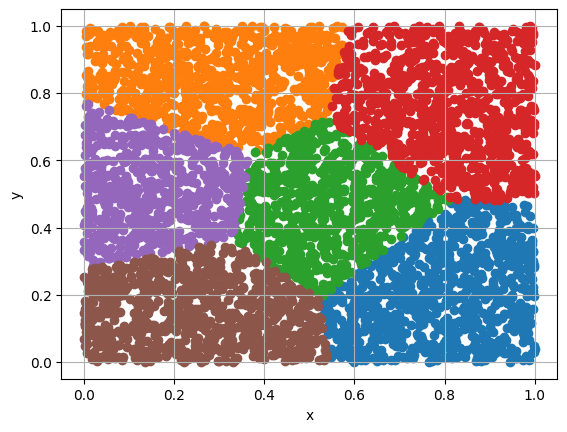

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import copy

def clusterization(array, k):
    n = len(array)
    dim = len(array[0])
    max_cluster_value = 1

    cluster = [[0 for i in range(dim)] for q in range(k)]
    cluster_content = [[] for i in range(k)]

    for i in range(dim):
        for q in range(k):
            cluster[q][i] = random.randint(0, max_cluster_value)

    cluster_content = data_distribution(array, cluster, k, n, dim)

    previous_cluster = copy.deepcopy(cluster)
    while True:
        cluster = cluster_update(cluster, cluster_content, k, dim)
        cluster_content = data_distribution(array, cluster, k, n, dim)
        if cluster == previous_cluster:
            break
        previous_cluster = copy.deepcopy(cluster)

    visualisation(cluster_content)

def cluster_update(cluster, cluster_content, k, dim):
    for i in range(k):
        for q in range(dim):
            updated_parameter = 0
            for j in range(len(cluster_content[i])):
                updated_parameter += cluster_content[i][j][q]
            if len(cluster_content[i]) != 0:
                updated_parameter = updated_parameter / len(cluster_content[i])
            cluster[i][q] = updated_parameter
    return cluster

def data_distribution(array, cluster, k, n, dim):
    cluster_content = [[] for i in range(k)]

    for i in range(n):
        min_distance = float('inf')
        suitable_cluster = -1
        for j in range(k):
            distance = 0
            for q in range(dim):
                distance += (array[i][q] - cluster[j][q]) ** 2
            distance = distance ** (1 / 2)
            if distance < min_distance:
                min_distance = distance
                suitable_cluster = j

        cluster_content[suitable_cluster].append(array[i])

    return cluster_content

def visualisation(cluster_content):
    k = len(cluster_content)
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("y")

    for i in range(k):
        x_coordinates = []
        y_coordinates = []
        for q in range(len(cluster_content[i])):
            x_coordinates.append(cluster_content[i][q][0])
            y_coordinates.append(cluster_content[i][q][1])
        plt.scatter(x_coordinates, y_coordinates)
    plt.show()

array = np.random.rand(5000, 2)
k = 6
clusterization(array, k)


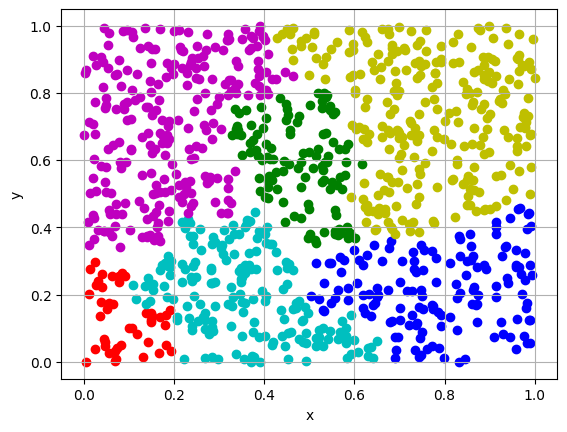

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import copy

def hierarchical_clustering(array, k):
    n = len(array)
    dim = len(array[0])

    cluster = [[array[i][j] for j in range(dim)] for i in range(n)]
    cluster_content = [[i] for i in range(n)]  # Кожен об'єкт починає у власному кластері

    while len(cluster) > k:
        min_distance = float('inf')
        merge_clusters = (-1, -1)  # Пара кластерів для об'єднання

        for i in range(len(cluster)):
            for j in range(i + 1, len(cluster)):
                distance = calculate_distance(cluster[i], cluster[j])
                if distance < min_distance:
                    min_distance = distance
                    merge_clusters = (i, j)

        cluster = merge_cluster(cluster, merge_clusters)
        cluster_content = merge_cluster_content(cluster_content, merge_clusters)

    visualize_clusters(cluster_content, array)

def calculate_distance(cluster1, cluster2):
    distance = 0
    for i in range(len(cluster1)):
        distance += (cluster1[i] - cluster2[i]) ** 2
    return np.sqrt(distance)

def merge_cluster(clusters, merge_clusters):
    i, j = merge_clusters
    merged_cluster = [(clusters[i][k] + clusters[j][k]) / 2 for k in range(len(clusters[i]))]
    return clusters[:i] + clusters[i+1:j] + clusters[j+1:] + [merged_cluster]

def merge_cluster_content(cluster_content, merge_clusters):
    i, j = merge_clusters
    merged_content = cluster_content[i] + cluster_content[j]
    return cluster_content[:i] + cluster_content[i+1:j] + cluster_content[j+1:] + [merged_content]

def visualize_clusters(cluster_content, array):
    k = len(cluster_content)
    colors = ['r', 'g', 'b', 'c', 'm', 'y']

    plt.grid()
    plt.xlabel("x")
    plt.ylabel("y")

    for i in range(k):
        cluster_points = cluster_content[i]
        x_coordinates = [array[point][0] for point in cluster_points]
        y_coordinates = [array[point][1] for point in cluster_points]
        color = colors[i % len(colors)]
        plt.scatter(x_coordinates, y_coordinates, c=color)
    plt.show()

array = np.random.rand(1000, 2)
k = 6  # Кількість кластерів
hierarchical_clustering(array, k)
